# Observations and Insights

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from pprint import pprint

In [4]:
# Creating data path for datasets
job_data_path="..\Output\job_company_merged_data.csv"

# Reading datasets
job_data = pd.read_csv(job_data_path)
job_data

,Unnamed: 0,job id,job level,location,job name,post date,category,company id,company name,content,...,state,Job Title,excel,machine,sql,python,javascript,tableau,html,css
0,0,2649786.0,Senior Level,"New York, NY",Data Analyst,2020-05-03T13:01:30.848085Z,Data Science,1274.0,Viventium,NaN,...,NY,Data Analyst,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2723310.0,Management,"Seattle, WA",Tanzu Infrastructure Technical Program Manager,2020-06-21T11:14:26.914893Z,Data Science,11784.0,VMware Carbon Black,NaN,...,WA,Other,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2235742.0,Senior Level,"New York, NY",Senior Data Analyst,2020-03-30T23:06:09.549139Z,Data Science,281.0,BounceX,NaN,...,NY,Data Analyst,NaN,NaN,True,True,NaN,NaN,NaN,NaN
3,3,243501.0,Mid Level,"New York, NY",Algo Strategy Developer,2020-03-20T23:04:01.202760Z,Data Science,1292.0,Hudson River Trading,NaN,...,NY,Data Analyst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2724616.0,Senior Level,"New York, NY",Tax Associate,2020-06-15T23:25:20.121105Z,Data Science,11909.0,Kforce,NaN,...,NY,Other,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,588,3133197.0,Senior Level,"Chicago, IL","Senior Software Engineer, Hadoop",2020-06-16T11:34:42.063438Z,Data Science,838.0,Epsilon,NaN,...,IL,Data Scientist,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
582,589,3094974.0,Management,"Philadelphia, PA",Director Supply Chain Data Science & Network O...,2020-06-09T11:20:21.159744Z,Data Science,954.0,GSK,NaN,...,PA,Data Scientist,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
583,590,2711903.0,Senior Level,"New York, NY","Data Scientist/Engineer (SAS, R code, Python &...",2020-04-24T23:04:10.712494Z,Data Science,1309.0,Medidata,NaN,...,NY,Other,NaN,NaN,True,True,NaN,NaN,NaN,NaN
584,591,3125033.0,Management,"New York, NY","Vice President, CIMD4554143",2020-06-13T11:20:01.292952Z,Data Science,850.0,Goldman Sachs,NaN,...,NY,Other,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN


Data Count Checks

In [5]:
#Industry Counts in the dataset
industry_count= job_data["industry 1"].value_counts()
industry_count

Unspecified                 283
Finance                      85
Consumer                     63
Healthcare                   36
Client Services              33
Engineering                  24
Consulting                   17
Advertising and Agencies     11
Food & Beverage              10
Education                     9
Arts and Music                8
Media                         3
Government                    1
Architecture                  1
Tech                          1
Entertainment & Gaming        1
Name: industry 1, dtype: int64

In [26]:
#validate job levels in the dataset
job_level_count= job_data["job level"].value_counts()
job_level_count

Senior Level    255
Mid Level       218
Management      104
Entry Level       4
Internship        3
Name: job level, dtype: int64

In [27]:
#validate job title category in the dataset
job_title_count= job_data["Job Title"].value_counts()
job_title_count

Data Scientist    249
Data Analyst      193
Other             142
Name: Job Title, dtype: int64

In [28]:
#validate job title category in the dataset
python_skill_count= job_data["python"].value_counts()
python_skill_count

True    256
Name: python, dtype: int64

In [29]:
#validate job title category in the dataset
sql_skill_count= job_data["sql"].value_counts()
sql_skill_count

True    236
Name: sql, dtype: int64

In [30]:
#validate job title category in the dataset
excel_skill_count= job_data["excel"].value_counts()
excel_skill_count

True    95
Name: excel, dtype: int64

In [31]:
#Industry Counts in the dataset
location= job_data["location"].value_counts()
location

New York, NY         229
San Francisco, CA    121
Boston, MA            47
Seattle, WA           47
Chicago, IL           41
Washington, DC        25
Flexible / Remote     22
Philadelphia, PA      17
Atlanta, GA           16
Los Angeles, CA       15
Houston, TX            4
Name: location, dtype: int64

# Graphs

## Job Opportunities for Data Science and Data Analysts

In [32]:
#grouping by job titles
job_titles= job_data.groupby("Job Title")

job_titles_count=job_titles.count()["category"]


#Creating a dataframe
job_titles_groupby_df=pd.DataFrame({"Total Count": job_titles_count})
job_titles_groupby_df.index.name=None
job_titles_groupby_df

#Sort descending order
job_titles_groupby_df.sort_values(["Total Count"],ascending=False)

,Total Count
Data Scientist,249
Data Analyst,193
Other,142


<IPython.core.display.Javascript object>


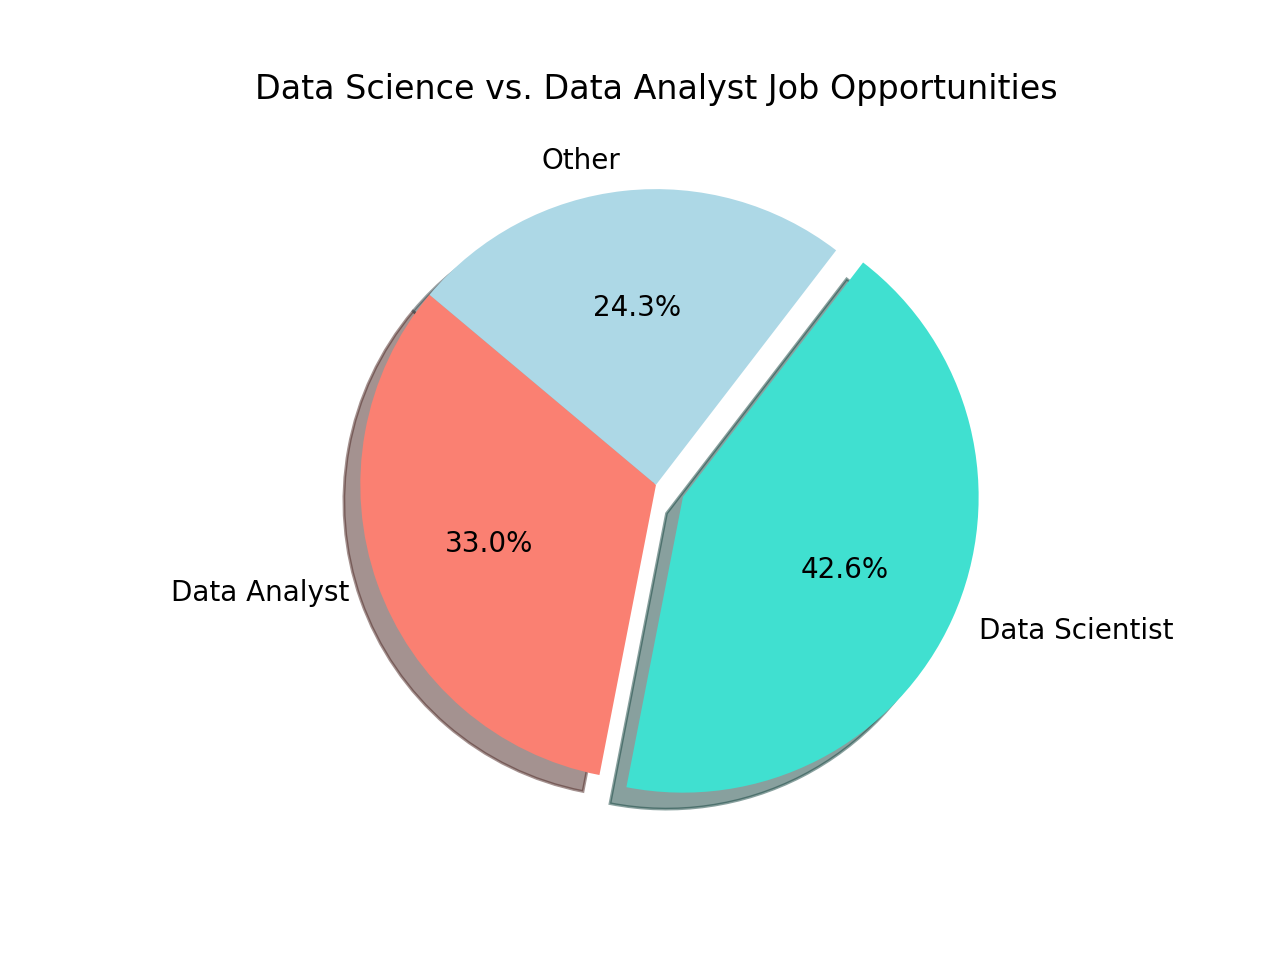

Text(0.5, 1.0, 'Data Science vs. Data Analyst Job Opportunities')

In [33]:
%matplotlib notebook

# Labels for the sections of our pie chart
labels = job_titles_groupby_df.index.values

# The values of each section of the pie chart
sizes = job_titles_groupby_df["Total Count"]

# The colors of each section of the pie char
colors = ["salmon", "turquoise", "lightblue"]

explode = (0,0.1,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Data Science vs. Data Analyst Job Opportunities")

#plt.show()

## Top 10 Industry Sectors Hiring in the Data Science Field

In [77]:
# Grouping by job industry
job_industry= job_data.groupby("industry 1")

job_industry_count=job_industry.count()["category"]

job_industry_df=pd.DataFrame({"Total Count": job_industry_count})
job_industry_df.index.name=None

job_industry_df.sort_values(["Total Count"],ascending=False).head(10)

top_10_industry_df=job_industry_df.sort_values(["Total Count"],ascending=False).head(10)
top_10_industry_df

,Total Count
Finance,118
Consumer,63
Enterprise Software & Network Solutions,56
Healthcare,38
Computer Hardware & Software,38
Client Services,34
Engineering,22
Internet,20
Consulting,17
Insurance,16


<IPython.core.display.Javascript object>


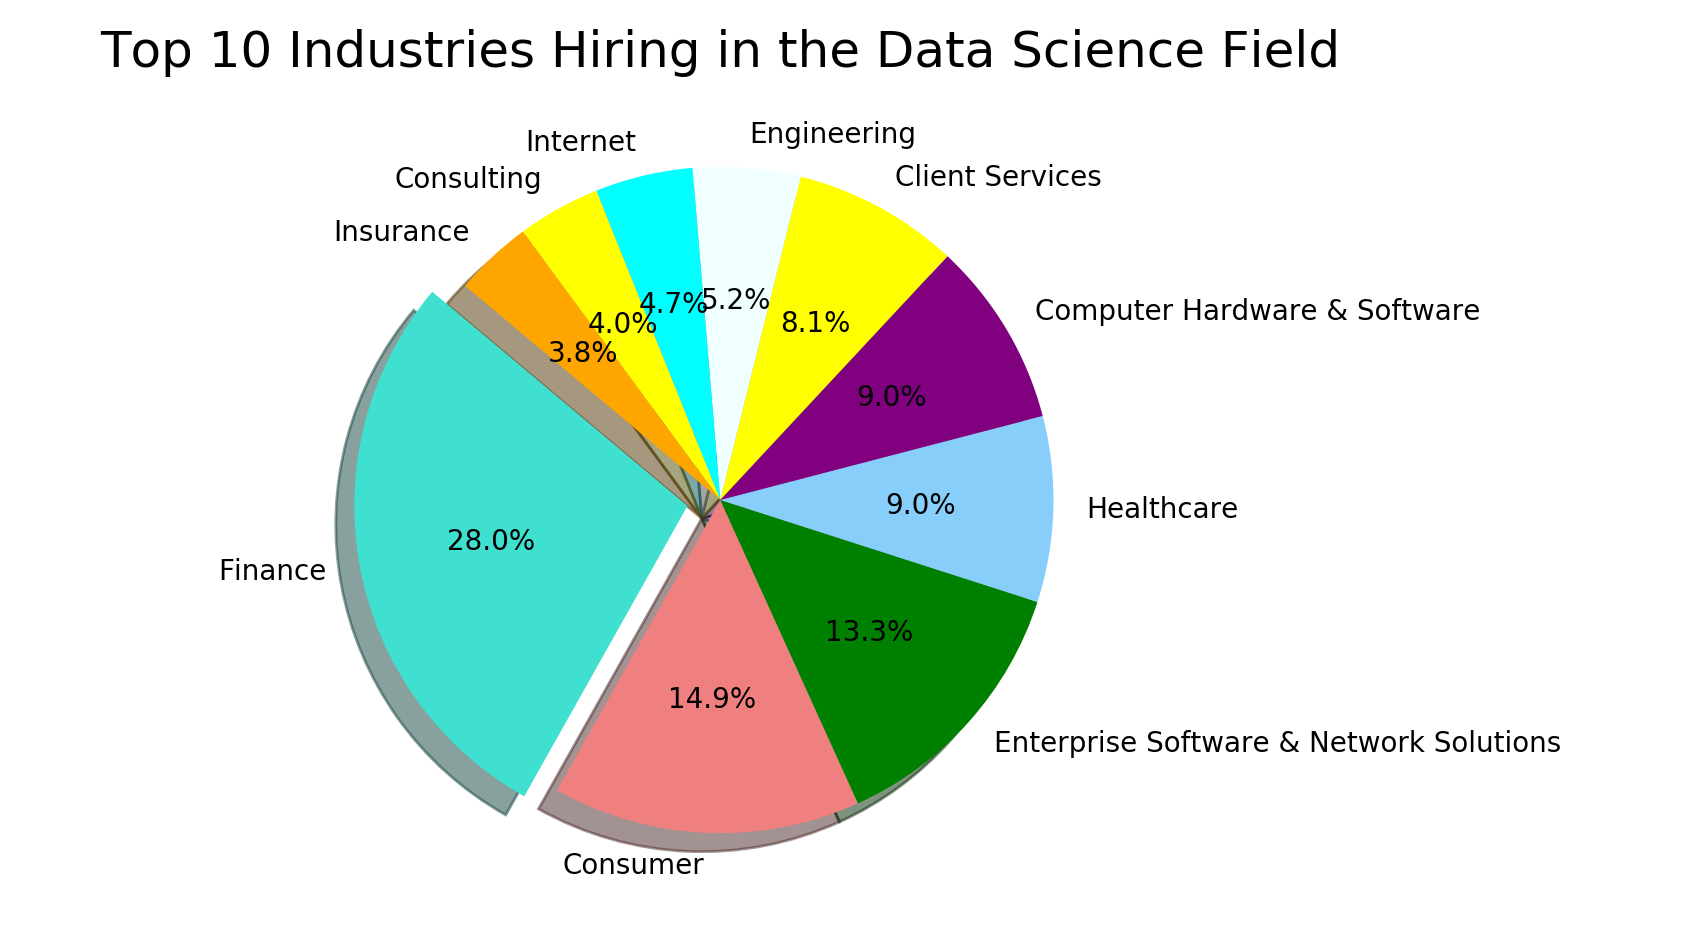

In [88]:
%matplotlib notebook

# Labels for the sections of our pie chart
labels = top_10_industry_df.index.values

# The values of each section of the pie chart
sizes = top_10_industry_df["Total Count"]

# The colors of each section of the pie chart
colors = ["turquoise", "lightcoral", "green", "lightskyblue","purple","yellow","azure","aqua","yellow","orange"]

explode = (0.1,0,0,0,0,0,0,0,0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Top 10 Industries Hiring in the Data Science Field",fontsize=18)
plt.savefig("..\Output\Industry Sectors.png")
plt.tight_layout()
plt.show()

# Top 10 Companies Posting Jobs in the Data Science Field

In [8]:
# Grouping by job industry
job_company= job_data.groupby("company name")

job_company_count=job_company.count()["category"]

job_company_df=pd.DataFrame({"Total Count": job_company_count})
job_company_df.index.name=None

job_company_df.sort_values(["Total Count"],ascending=False).head(10)

top_10_company_df=job_company_df.sort_values(["Total Count"],ascending=False).head(10)
top_10_company_df

,Total Count
Kforce,35
Apple,27
Medidata,25
Goldman Sachs,24
GSK,20
Facebook,19
Instacart,15
Invitae,14
Wells Fargo,14
Memorial Sloan Kettering Cancer Center,14


<IPython.core.display.Javascript object>


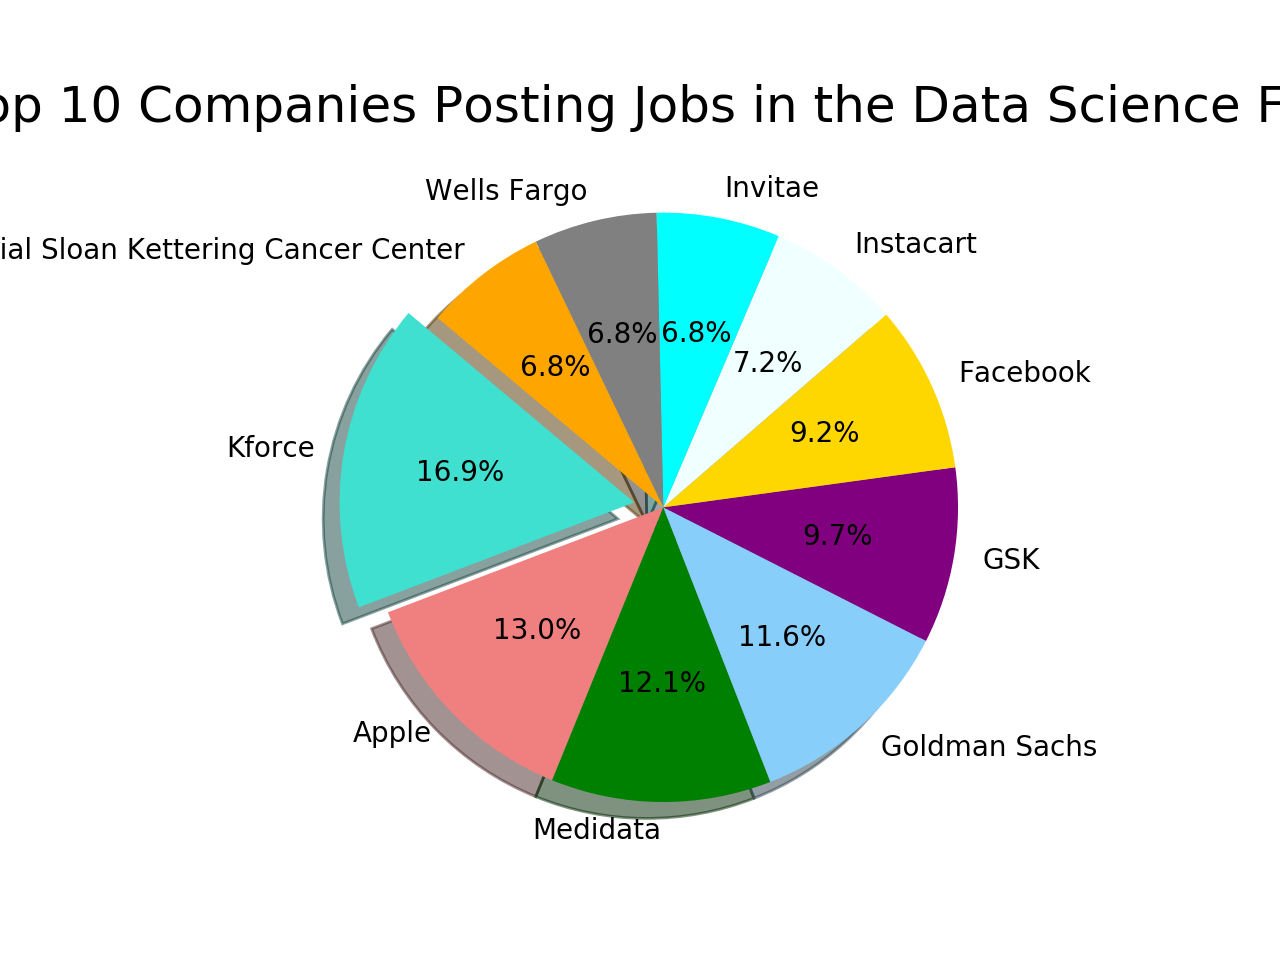

In [9]:
%matplotlib notebook

# Labels for the sections of our pie chart
labels = top_10_company_df.index.values

# The values of each section of the pie chart
sizes = top_10_company_df["Total Count"]

# The colors of each section of the pie chart
colors = ["turquoise", "lightcoral", "green", "lightskyblue","purple","gold","azure","aqua","gray","orange"]

explode = (0.1,0,0,0,0,0,0,0,0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Top 10 Companies Posting Jobs in the Data Science Field",fontsize=18)
plt.tight_layout()
plt.savefig("..\Top 10 Companies Posting Jobs.png")
plt.show()

# Job Level Positions by City

Data Scientist

In [10]:
data_scientists_df= job_data.loc[job_data["Job Title"]=="Data Scientist"]

#grouping by city
city= data_scientists_df.groupby(["location","job level"])[["job id"]].count().unstack()
city

job id                       
job level         Management Mid Level Senior Level
location                                           
Atlanta, GA              1.0       NaN          2.0
Boston, MA               4.0       7.0          9.0
Chicago, IL              1.0       NaN         15.0
Flexible / Remote        NaN       3.0          8.0
Houston, TX              NaN       1.0          NaN
Los Angeles, CA          NaN       NaN          3.0
New York, NY             8.0      29.0         47.0
Philadelphia, PA         2.0       2.0          4.0
San Francisco, CA        4.0      24.0         35.0
Seattle, WA              NaN      17.0         11.0
Washington, DC           1.0       3.0          8.0

<IPython.core.display.Javascript object>


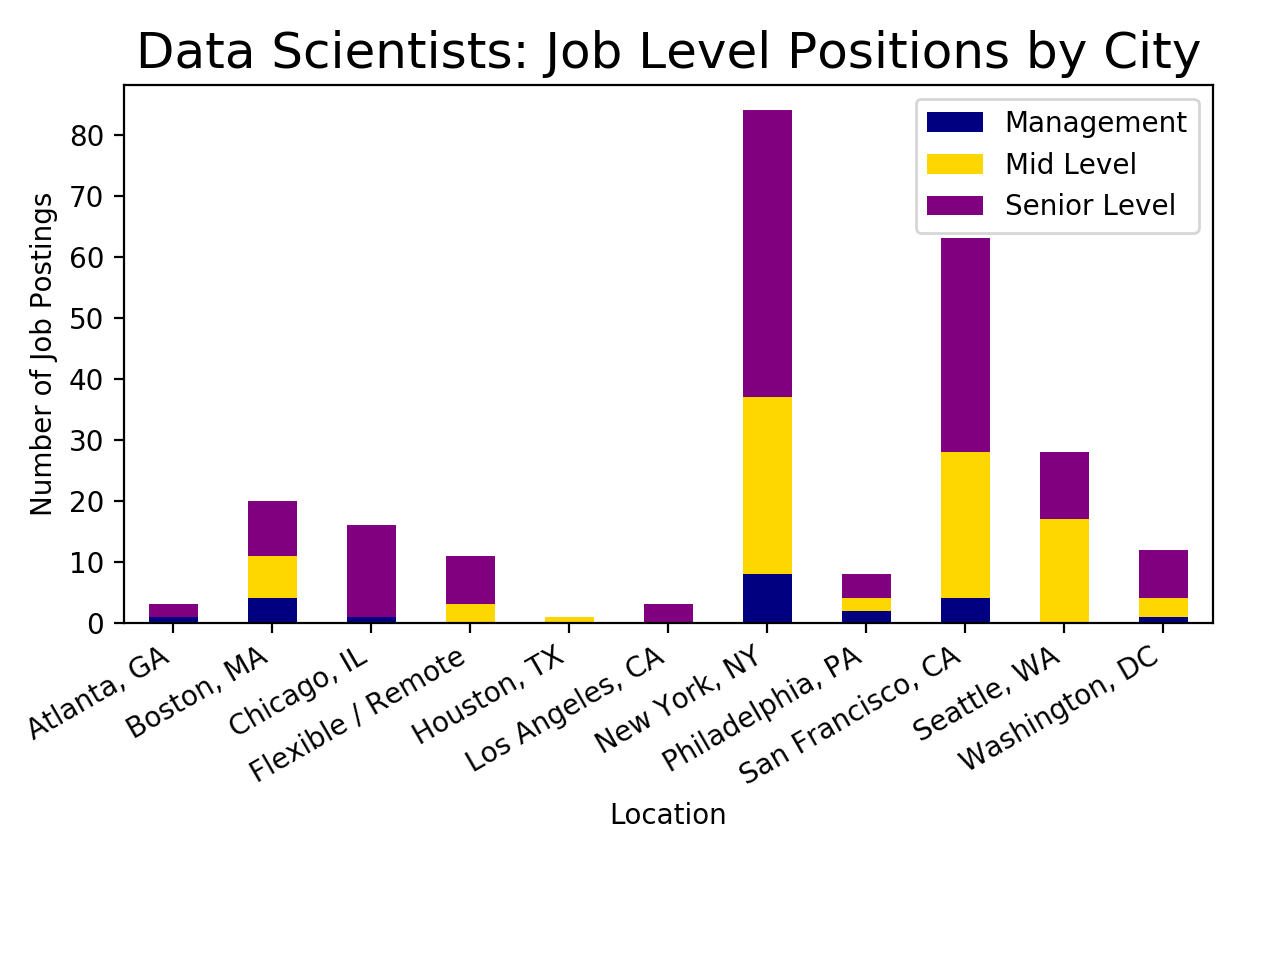

In [11]:
%matplotlib notebook

colors=["navy","gold","purple"]
city.plot.bar(stacked=True, color=colors)
plt.title("Data Scientists: Job Level Positions by City",fontsize=18)
plt.legend(["Management","Mid Level","Senior Level"])
plt.xlabel("Location")
plt.ylabel("Number of Job Postings")
plt.tight_layout()
plt.xticks(rotation=30, ha='right')
plt.savefig("..\Output\Data Scientists_Job Level Positions by City.png")

Data Analyst

In [12]:
data_analyst_df= job_data.loc[job_data["Job Title"]=="Data Analyst"]

city= data_analyst_df.groupby(["location","job level"])[["job id"]].count().unstack()
city

job id                                             
job level         Entry Level Internship Management Mid Level Senior Level
location                                                                  
Atlanta, GA               NaN        NaN        1.0       8.0          3.0
Boston, MA                NaN        NaN        2.0       6.0          6.0
Chicago, IL               NaN        NaN        1.0       5.0          9.0
Flexible / Remote         NaN        NaN        1.0       NaN          3.0
Houston, TX               NaN        NaN        NaN       2.0          NaN
Los Angeles, CA           NaN        NaN        2.0       4.0          3.0
New York, NY              3.0        NaN       15.0      35.0         24.0
Philadelphia, PA          NaN        NaN        1.0       1.0          2.0
San Francisco, CA         NaN        NaN        9.0      10.0         16.0
Seattle, WA               NaN        1.0        2.0       4.0          8.0
Washington, DC            NaN        NaN        1.0       1.0          4.0

<IPython.core.display.Javascript object>


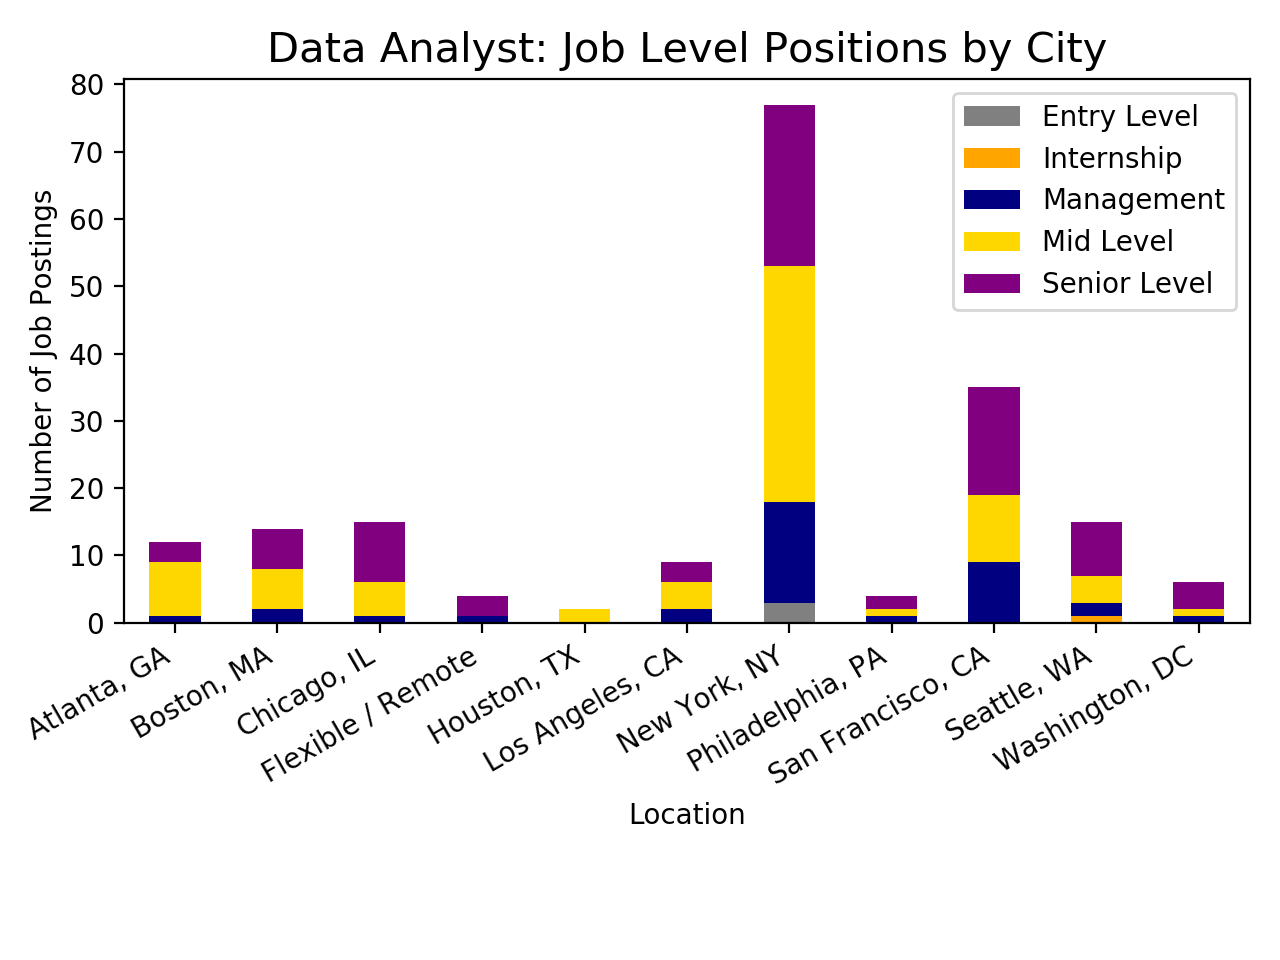

In [13]:
%matplotlib notebook

colors=["gray","orange","navy","gold","purple"]
city.plot.bar(stacked=True, color=colors)
plt.title("Data Analyst: Job Level Positions by City",fontsize=15)
plt.legend(["Entry Level","Internship","Management","Mid Level","Senior Level"])
plt.xlabel("Location")
plt.ylabel("Number of Job Postings")
plt.tight_layout()
plt.xticks(rotation=30, ha='right')
plt.savefig("..\Output\Data Analyst_Job Level Positions by City.png")

In [57]:
# Grouping by job industry
test= job_data.groupby(["location","Job Title"])

test_count=test.count()["category"]

test_df=pd.DataFrame({"Total Count": test_count})
#test_df.index.name=None

test_df.sort_values(["Total Count"],ascending=False)

test_df

Total Count
location          Job Title                  
Atlanta, GA       Data Analyst             11
                  Data Scientist            3
                  Other                     2
Boston, MA        Data Analyst             14
                  Data Scientist           20
                  Other                    13
Chicago, IL       Data Analyst             15
                  Data Scientist           16
                  Other                    10
Flexible / Remote Data Analyst              4
                  Data Scientist           11
                  Other                     7
Houston, TX       Data Analyst              2
                  Data Scientist            1
                  Other                     1
Los Angeles, CA   Data Analyst              9
                  Data Scientist            3
                  Other                     3
New York, NY      Data Analyst             78
                  Data Scientist           84
                  Other                    67
Philadelphia, PA  Data Analyst              4
                  Data Scientist            8
                  Other                     5
San Francisco, CA Data Analyst             35
                  Data Scientist           63
                  Other                    23
Seattle, WA       Data Analyst             15
                  Data Scientist           28
                  Other                     4
Washington, DC    Data Analyst              6
                  Data Scientist           12
                  Other                     7

Skills

In [14]:
#"excel","python","sql","machine","javascript","tableau","html","css"

#validate job title category in the dataset

location_python=job_data.groupby(["location"])
python_skill_count= location_python["python"].value_counts()

python_skill_df=pd.DataFrame({"Python Total Count":python_skill_count})
python_skill_df.index.name=None

python_skill_df

,,Python Total Count
location,python,
"Atlanta, GA",True,6
"Boston, MA",True,20
"Chicago, IL",True,13
Flexible / Remote,True,3
"Houston, TX",True,1
"Los Angeles, CA",True,7
"New York, NY",True,112
"Philadelphia, PA",True,6
"San Francisco, CA",True,56


In [15]:
#"excel","python","sql","machine","javascript","tableau","html","css"

#validate job title category in the dataset

location_sql=job_data.groupby(["location"])
sql_skill_count= location_sql["sql"].value_counts()

sql_skill_df=pd.DataFrame({"SQL Total Count":sql_skill_count})
sql_skill_df.index.name=None

sql_skill_df

,,SQL Total Count
location,sql,
"Atlanta, GA",True,10
"Boston, MA",True,13
"Chicago, IL",True,19
Flexible / Remote,True,4
"Los Angeles, CA",True,7
"New York, NY",True,94
"Philadelphia, PA",True,5
"San Francisco, CA",True,62
"Seattle, WA",True,10


In [16]:
#"excel","python","sql","machine","javascript","tableau","html","css"

#validate job title category in the dataset

location_machine=job_data.groupby(["location"])
machine_skill_count= location_sql["machine"].value_counts()

machine_skill_df=pd.DataFrame({"Machine Total Count":machine_skill_count})
machine_skill_df.index.name=None

machine_skill_df

,,Machine Total Count
location,machine,
"Atlanta, GA",True,5
"Boston, MA",True,17
"Chicago, IL",True,8
Flexible / Remote,True,8
"Los Angeles, CA",True,1
"New York, NY",True,61
"Philadelphia, PA",True,4
"San Francisco, CA",True,40
"Seattle, WA",True,29


In [17]:
#"excel","python","sql","machine","javascript","tableau","html","css"

#validate job title category in the dataset

location_javascript=job_data.groupby(["location"])
javascript_skill_count= location_sql["javascript"].value_counts()

javascript_skill_df=pd.DataFrame({"Javascript Total Count":javascript_skill_count})
javascript_skill_df.index.name=None

javascript_skill_df

,,Javascript Total Count
location,javascript,
"Boston, MA",True,2
"Chicago, IL",True,1
Flexible / Remote,True,1
"New York, NY",True,5
"Philadelphia, PA",True,1
"San Francisco, CA",True,4
"Seattle, WA",True,2
"Washington, DC",True,2


In [18]:
#"excel","python","sql","machine","javascript","tableau","html","css"

#validate job title category in the dataset

location_tableau=job_data.groupby(["location"])
tableau_skill_count= location_sql["tableau"].value_counts()

tableau_skill_df=pd.DataFrame({"Tableau Total Count":tableau_skill_count})
tableau_skill_df.index.name=None

tableau_skill_df

,,Tableau Total Count
location,tableau,
"Atlanta, GA",True,5
"Boston, MA",True,2
"Chicago, IL",True,10
Flexible / Remote,True,4
"Los Angeles, CA",True,5
"New York, NY",True,40
"Philadelphia, PA",True,3
"San Francisco, CA",True,21
"Seattle, WA",True,2


In [19]:
#"excel","python","sql","machine","javascript","tableau","html","css"

#validate job title category in the dataset

location_html=job_data.groupby(["location"])
html_skill_count= location_sql["html"].value_counts()

html_skill_df=pd.DataFrame({"Html Total Count":html_skill_count})
html_skill_df.index.name=None

html_skill_df

,,Html Total Count
location,html,
"Chicago, IL",True,1
"New York, NY",True,1
"Washington, DC",True,1


In [20]:
#"excel","python","sql","machine","javascript","tableau","html","css"

#validate job title category in the dataset

location_css=job_data.groupby(["location"])
css_skill_count= location_sql["css"].value_counts()

css_skill_df=pd.DataFrame({"Css Total Count":html_skill_count})
css_skill_df.index.name=None

css_skill_df

,,Css Total Count
location,html,
"Chicago, IL",True,1
"New York, NY",True,1
"Washington, DC",True,1


In [21]:
skill_summary_df=pd.merge(python_skill_df,sql_skill_df, on="location", how="outer")
skill_summary_df=pd.merge(skill_summary_df,machine_skill_df, on="location", how="outer")
skill_summary_df=pd.merge(skill_summary_df,javascript_skill_df, on="location", how="outer")
skill_summary_df=pd.merge(skill_summary_df,tableau_skill_df, on="location", how="outer")

skill_summary_df


,Python Total Count,SQL Total Count,Machine Total Count,Javascript Total Count,Tableau Total Count
location,,,,,
"Atlanta, GA",6,10.0,5.0,NaN,5.0
"Boston, MA",20,13.0,17.0,2.0,2.0
"Chicago, IL",13,19.0,8.0,1.0,10.0
Flexible / Remote,3,4.0,8.0,1.0,4.0
"Houston, TX",1,NaN,NaN,NaN,NaN
"Los Angeles, CA",7,7.0,1.0,NaN,5.0
"New York, NY",112,94.0,61.0,5.0,40.0
"Philadelphia, PA",6,5.0,4.0,1.0,3.0
"San Francisco, CA",56,62.0,40.0,4.0,21.0


<IPython.core.display.Javascript object>


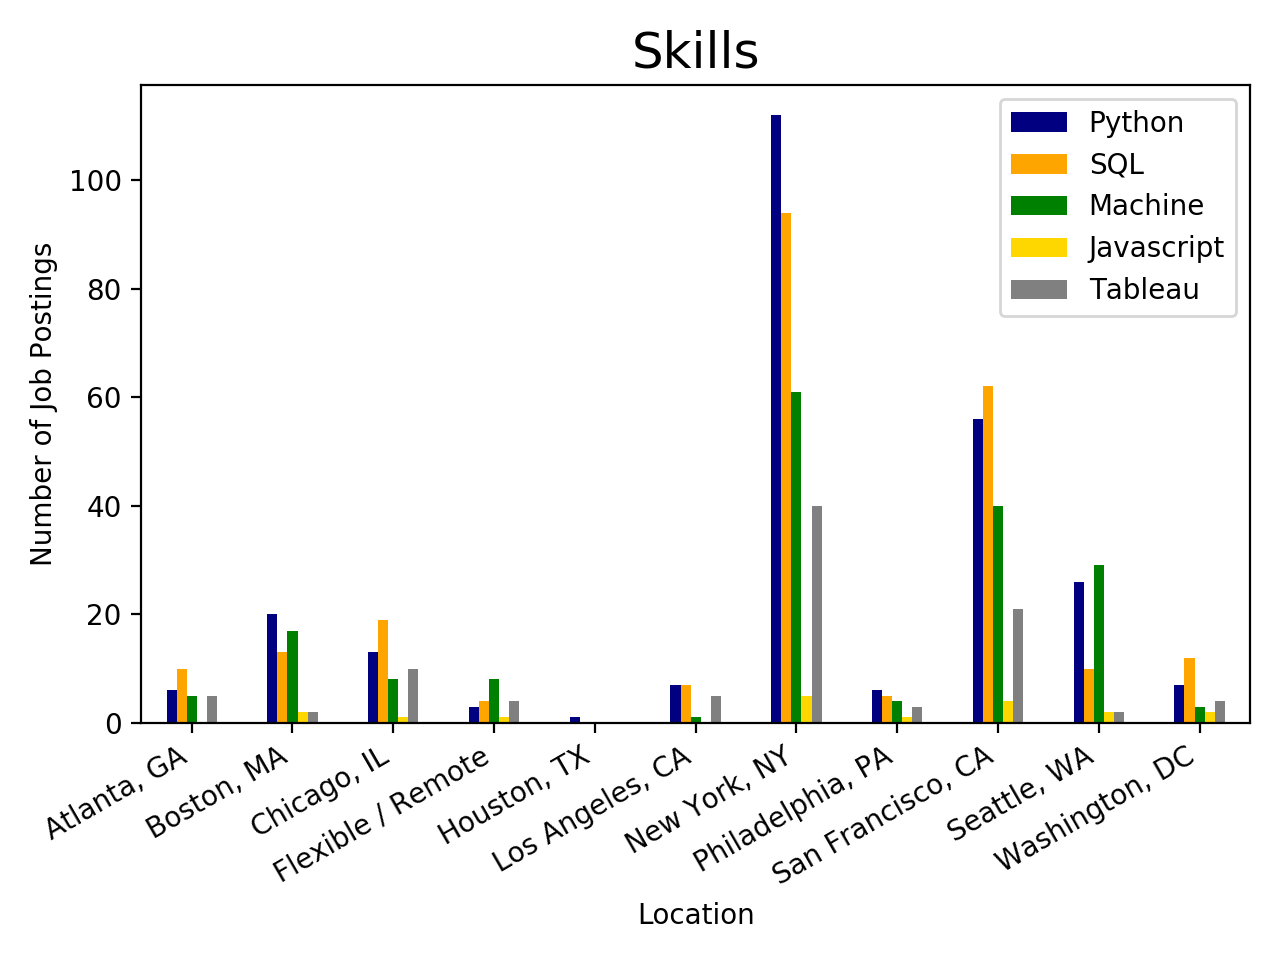

In [22]:
%matplotlib notebook

colors=["navy","orange","green","gold","gray"]
skill_summary_df.plot.bar(stacked=False, color=colors)
plt.title("Skills",fontsize=18)
plt.legend(["Python","SQL","Machine","Javascript","Tableau"])
plt.xlabel("Location")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig("..\Output\Skillsets by City.png")